In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [7]:
df = pd.read_csv(data)

In [7]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [8]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [9]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [11]:
df.dtypes[df.dtypes == 'object']

origin        object
fuel_type     object
drivetrain    object
dtype: object

In [24]:
df[['engine_displacement','horsepower','vehicle_weight','model_year']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

In [23]:
median_horsepower = df['horsepower'].median()

print(f"The median horsepower is: {median_horsepower}")

The median horsepower is: 149.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

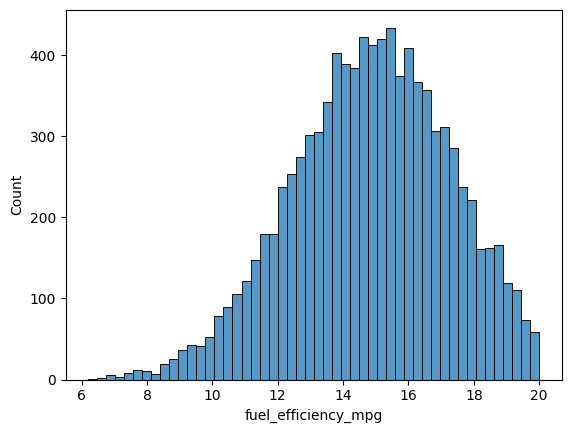

In [10]:
sbn.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 20], bins = 50)

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['Europe' 'USA' 'Asia']
3

fuel_type
['Gasoline' 'Diesel']
2

drivetrain
['All-wheel drive' 'Front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [25]:
n = len(df)

In [26]:
n

9704

In [27]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [28]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [33]:
df.iloc[9700:]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551
9703,270,3.0,140.0,2908.043477,14.7,2005,Asia,Diesel,All-wheel drive,-1.0,14.884467


In [34]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [36]:
len(df_train)

5824

In [40]:
idx = np.arange(n)

In [50]:
np.random.seed(42)
np.random.shuffle(idx)

In [51]:
idx

array([1333, 4441, 5863, ...,  529, 5571,  722], shape=(9704,))

In [52]:
idx[:n_train]

array([1333, 4441, 5863, ..., 2573, 2407, 3919], shape=(5824,))

In [53]:
df.iloc[idx[:5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1333,230,3.0,157.0,3325.260899,14.9,2016,USA,Diesel,Front-wheel drive,-1.0,13.213944
4441,200,13.0,176.0,3027.440317,16.2,2023,Europe,Gasoline,All-wheel drive,1.0,15.079408
5863,190,1.0,155.0,3370.037435,13.9,2007,USA,Gasoline,All-wheel drive,2.0,13.161624
2285,250,6.0,148.0,3364.326585,12.9,2011,Europe,Diesel,All-wheel drive,0.0,13.882635
6655,210,2.0,NaN,2962.659410,10.4,2014,Asia,Diesel,All-wheel drive,-1.0,15.382503


In [54]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [55]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1333,230,3.0,157.0,3325.260899,14.9,2016,USA,Diesel,Front-wheel drive,-1.0,13.213944
4441,200,13.0,176.0,3027.440317,16.2,2023,Europe,Gasoline,All-wheel drive,1.0,15.079408
5863,190,1.0,155.0,3370.037435,13.9,2007,USA,Gasoline,All-wheel drive,2.0,13.161624
2285,250,6.0,148.0,3364.326585,12.9,2011,Europe,Diesel,All-wheel drive,0.0,13.882635
6655,210,2.0,NaN,2962.659410,10.4,2014,Asia,Diesel,All-wheel drive,-1.0,15.382503


In [56]:
len(df_train), len(df_val), len(df.test)

AttributeError: 'DataFrame' object has no attribute 'val'